In [1]:
pip install scikit-learn

You should consider upgrading via the 'c:\Users\pruth\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



     ---------------------------------------- 10.6/10.6 MB 8.6 MB/s eta 0:00:00
     ---------------------------------------- 46.2/46.2 MB 6.9 MB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 KB 3.7 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [2]:
df=pd.read_csv("NSE-Tata.csv")
df.shape

(1235, 8)

In [4]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

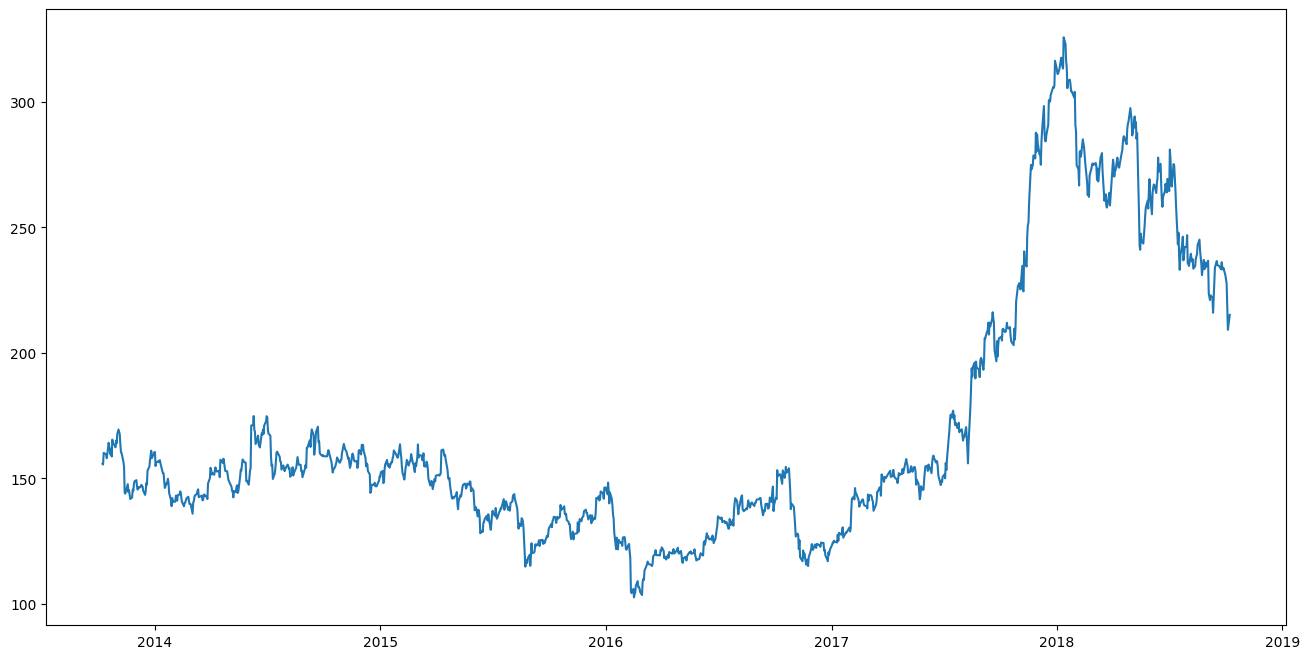

In [5]:
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [5]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [6]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

In [7]:
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

C:\Users\pruth\AppData\Local\Temp\ipykernel_4568\628050910.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  new_dataset["Date"][i]=data['Date'][i]
C:\Users\pruth\AppData\Local\Temp\ipykernel_4568\628050910.py:3: FutureWarning: ChainedAssi

In [8]:
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)

In [9]:
final_dataset=new_dataset.values


In [10]:
train_data=final_dataset[0:927,:]
valid_data=final_dataset[927:,:]


In [11]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

In [12]:
x_train_data,y_train_data=[],[]


In [13]:
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

In [14]:
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))


In [15]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

c:\Users\pruth\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(x_train_data,y_train_data,epochs=1,batch_size=10,verbose=2)

87/87 - 9s - 102ms/step - loss: 0.0124


In [17]:
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data.shape


(368, 1)

In [18]:

inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

In [19]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i])
X_test=np.array(X_test)

In [20]:
X_test

array([[[0.21940834],
        [0.21716719],
        [0.21873599],
        ...,
        [0.23576871],
        [0.24518153],
        [0.23733752]],

       [[0.21716719],
        [0.21873599],
        [0.21716719],
        ...,
        [0.24518153],
        [0.23733752],
        [0.22882116]],

       [[0.21873599],
        [0.21716719],
        [0.20685791],
        ...,
        [0.23733752],
        [0.22882116],
        [0.20528911]],

       ...,

       [[0.24137158],
        [0.24271627],
        [0.24069924],
        ...,
        [0.24831914],
        [0.25459435],
        [0.25728373]],

       [[0.24271627],
        [0.24069924],
        [0.23442403],
        ...,
        [0.25459435],
        [0.25728373],
        [0.25773196]],

       [[0.24069924],
        [0.23442403],
        [0.25930076],
        ...,
        [0.25728373],
        [0.25773196],
        [0.2371134 ]]])

In [22]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
prediction_closing=model.predict(X_test)
prediction_closing=scaler.inverse_transform(prediction_closing)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


In [23]:
train_data=new_dataset[:927]
valid_data=new_dataset[927:]
valid_data['Predictions'] = prediction_closing

C:\Users\pruth\AppData\Local\Temp\ipykernel_4568\2731108208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = prediction_closing


In [26]:
model.save('sfinal_lstm_model.h5', include_optimizer=False, save_format='h5')

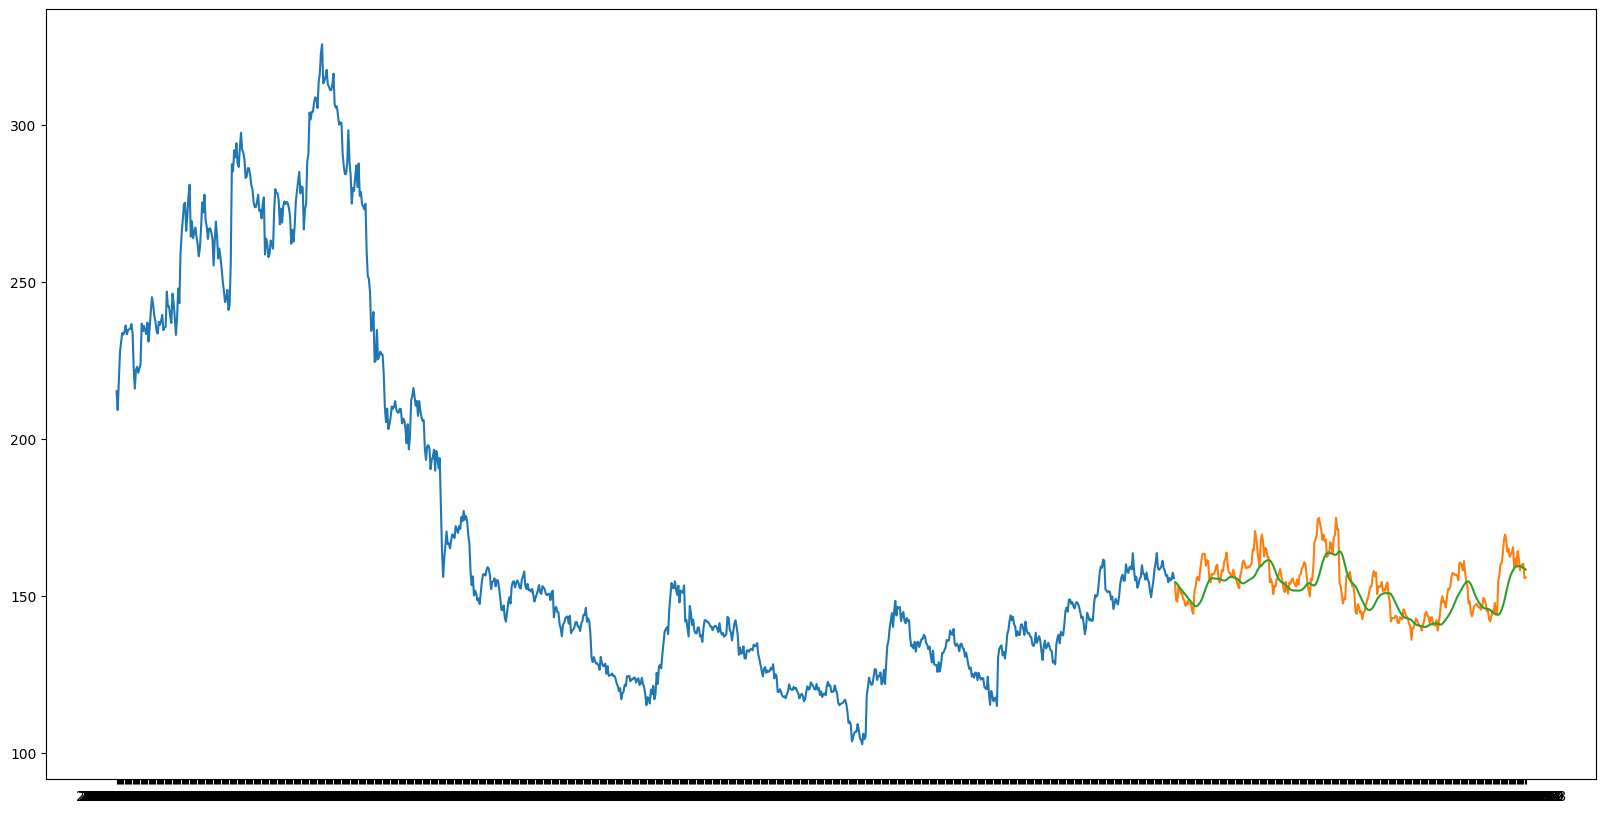

In [25]:

plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])